In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
import featureEngineering

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(20,6)

In [3]:
# Function to convert duration into minutes

def durationInMin(Duration):
    h = Duration.str.extract('(\d+)h', expand=False).astype(float)*60
    m = Duration.str.extract('(\d+)m', expand=False).astype(float)
    duration_min = h.fillna(0)+m.fillna(0)
    return duration_min

In [4]:
# Function to identify whether departure time during peak hours or not
# morning 9-12 and evening 7-10 are peak hours

def isPeakHourDept(dep_hr):
    return dep_hr.apply(lambda x: 1 if x in([9,10,11,12,19,20,21,22]) else 0)

In [5]:
# Function to identify whether week day is weekend or not
# weekday 4,5,6 are weekend
# weekday 0,1,2,3 are not weekend

def isWeekend(weekDay):
    return weekDay.apply(lambda x: 1 if x in([4,5,6]) else 0)

In [6]:
train_df = pd.read_excel(r'data\Data_Train.xlsx', sheet_name='Sheet1', converters= {'Date_of_Journey': pd.to_datetime})

train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
# one value is missing for Route column 
# One value is missing for Total_Stops column

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


# EDA

In [8]:
# check if the missing value is same record
# It is the same record for which values are missing

train_df[pd.isna(train_df.Route)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2019-06-05,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
# Since there are good no of observations drop the observation with null values

print(train_df.shape)
train_df.dropna(inplace=True)
print(train_df.shape)

(10683, 11)
(10682, 11)


In [10]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.54881,1759.0,5277.0,8372.0,12373.0,79512.0


In [11]:
# Extract week day, month day and month from journey date and create sepparate column for each
# Week day will provide info about whether it is a weekday or weekend. Price might be more on weekends

train_df['flight_day'] = train_df.Date_of_Journey.dt.day
train_df['flight_weekday'] = train_df.Date_of_Journey.dt.weekday
train_df['flight_month'] = train_df.Date_of_Journey.dt.month

train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flight_day,flight_weekday,flight_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,4,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,3,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,3,1


In [12]:


train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flight_day,flight_weekday,flight_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,4,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,3,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,3,1


In [13]:
# Duration
# Check if any data point has d (day)
any(['d' in val for val in train_df.Duration.values])

False

In [14]:
train_df['dep_hr'] = pd.to_datetime(train_df.Dep_Time).dt.hour
train_df['dep_minute'] = pd.to_datetime(train_df.Dep_Time).dt.minute
#list(map(int,train_df.iloc[1].Dep_Time.split(':', )))


train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flight_day,flight_weekday,flight_month,dep_hr,dep_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,4,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,3,12,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,3,1,16,50


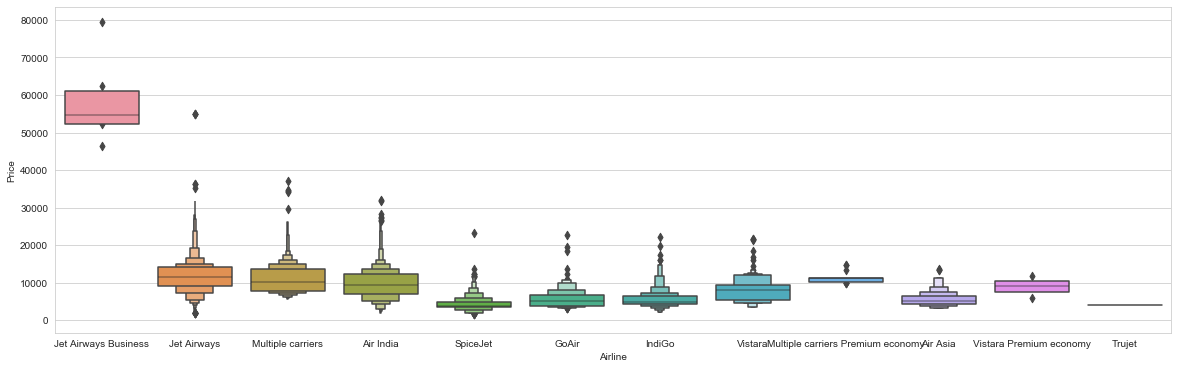

In [15]:
# Visualize price distribution for each airline
# Jet Business class prices are highest
# For other airlines price ranges are almost similar

sns.boxenplot(data=train_df.sort_values("Price", ascending=False), x='Airline', y='Price');

#sns.catplot(data=train_df.sort_values("Price", ascending=False), x='Airline', y='Price', kind='boxen', height=6, aspect=3);

In [16]:
# check value counts for each Airline

train_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [17]:
train_df[train_df.Airline.isin(["Vistara Premium economy", "Trujet"])].index

Int64Index([426, 2878, 7657, 8615], dtype='int64')

In [18]:
# last four airlines are having very minimal records
# Either we can drop them or combine them to make premium economy airlines
# Jet Airways Business has only 6 observations but price for these flights is highest - keep it
# Vistara Premium economy has only 3 observations and price is almost similar to Vistara flights. We can drop these observations.
# Trujet has only 1 observations, drop this record

train_df.drop(train_df[train_df.Airline.isin(["Vistara Premium economy", "Trujet"])].index, axis=0, inplace=True)

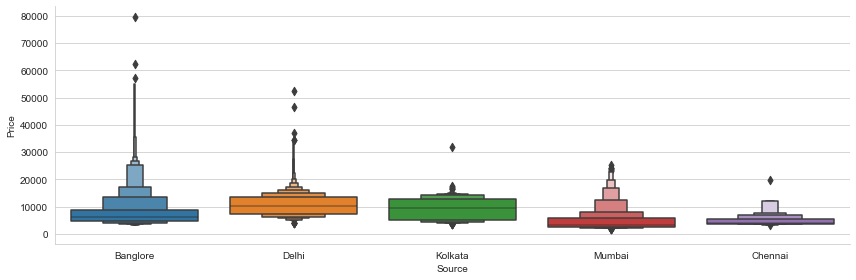

In [19]:
# Check for price distribution for each Source City
# Price ranges are almost similar for all the source cities

sns.catplot(data=train_df.sort_values("Price", ascending=False), x='Source', y="Price", kind="boxen", height=4, aspect=3);

# Feature Engineering

In [37]:
def fetEngineering(df):
    
    df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y")
    
    # drop null observations
    df.dropna(inplace=True)
    
    # last four airlines are having very minimal records
    # Either we can drop them or combine them to make premium economy airlines
    # Jet Airways Business has only 6 observations but price for these flights is highest - keep it
    # Vistara Premium economy has only 3 observations and price is almost similar to Vistara flights. We can drop these observations.
    # Trujet has only 1 observations, drop this record
    train_df.drop(train_df[train_df.Airline.isin(["Vistara Premium economy", "Trujet"])].index, axis=0, inplace=True)

    # extract day, weekday and month from Date_of_Journey
    df['flight_day'] = df.Date_of_Journey.dt.day
    df['flight_weekday'] = df.Date_of_Journey.dt.weekday
    df['flight_month'] = df.Date_of_Journey.dt.month

    # extract hour and minutes from Dep_Time
    df['dep_hr'] = pd.to_datetime(df.Dep_Time).dt.hour
    df['dep_minute'] = pd.to_datetime(df.Dep_Time).dt.minute
    #list(map(int,train_df.iloc[1].Dep_Time.split(':', )))

    # apply functions on dataframe
        #1. duration_min
        #2. isWeekend
        #3. isPeakHourDept
    df['duration_min'] = durationInMin(df['Duration'])
    df['is_weekend'] = isWeekend(df['flight_weekday'])
    df['is_peakHourDept'] = isPeakHourDept(df['dep_hr'])

    # Onehot encoding on Airline, Source, Destination columns
    oh_cols = ['Airline', 'Source', 'Destination']    
    oh_df = pd.get_dummies(df, columns=oh_cols, drop_first=True)
    
    # Label encode Total_Stops feature
    df['stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})
    
    # Drop unwanted columns 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'
    drop_cols = ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Total_Stops']
    oh_df.drop(drop_cols, axis=1, inplace=True)
    
    return oh_df



In [38]:
train_df.Total_Stops.value_counts()

1 stop      5624
non-stop    3488
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
fet_train_df = fetEngineering(train_df)
fet_train_df.head()

,Price,flight_day,flight_weekday,flight_month,dep_hr,dep_minute,duration_min,is_weekend,is_peakHourDept,stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,6,3,22,20,170.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7662,5,5,1,5,50,445.0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13882,6,4,9,9,25,1140.0,1,1,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,6218,5,3,12,18,5,325.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,13302,3,3,1,16,50,285.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
X = fet_train_df.iloc[:,1:]
y = fet_train_df.Price

X.head()

,flight_day,flight_weekday,flight_month,dep_hr,dep_minute,duration_min,is_weekend,is_peakHourDept,stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24,6,3,22,20,170.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,5,1,5,50,445.0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6,4,9,9,25,1140.0,1,1,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,5,3,12,18,5,325.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,3,1,16,50,285.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
test_df = pd.read_excel(r'data\Data_Test.xlsx', sheet_name='Sheet1', converters= {'Date_of_Journey': pd.to_datetime})
fet_test_df = fetEngineering(test_df)
fet_test_df.head()

,flight_day,flight_weekday,flight_month,dep_hr,dep_minute,duration_min,is_weekend,is_peakHourDept,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,3,6,17,30,655.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,5,3,12,6,20,240.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21,1,5,19,15,1425.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21,1,5,8,0,780.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24,0,6,23,55,170.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
from sklearn.ensemble import ExtraTreesRegressor
et_reg = ExtraTreesRegressor()
et_reg = et_reg.fit(X,y)
fet_imp = et_reg.feature_importances_

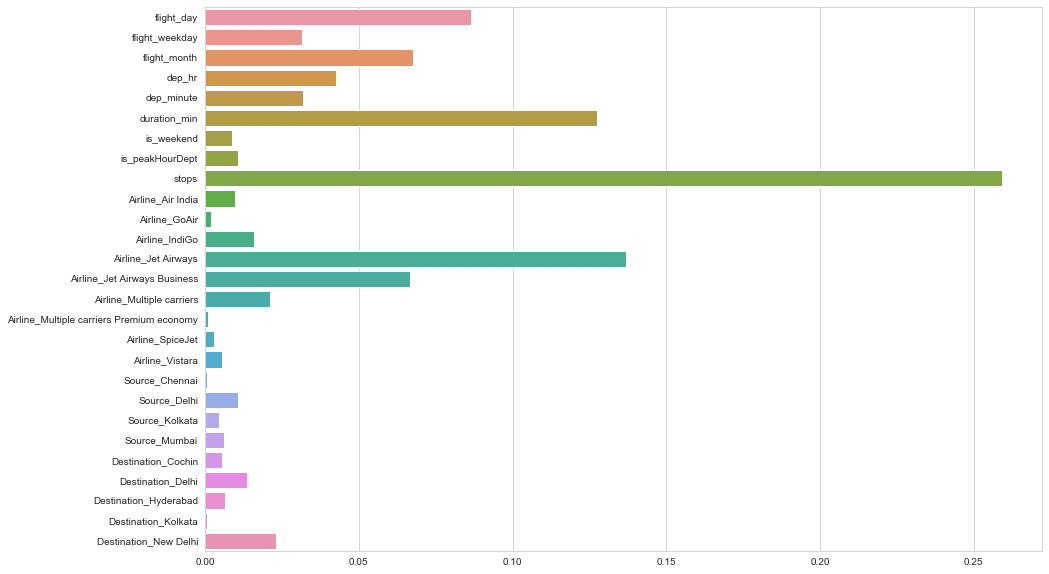

In [65]:
plt.figure(figsize=(15,10))
sns.barplot(y=X.columns, x=fet_imp, orient='h');

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [69]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor = regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [73]:
from sklearn.metrics import r2_score

In [74]:
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
test_score_r2 = r2_score(y_test,  y_pred)
train_score, test_score, test_score_r2

(0.9501981625436946, 0.8312685787614741, 0.8312685787614741)

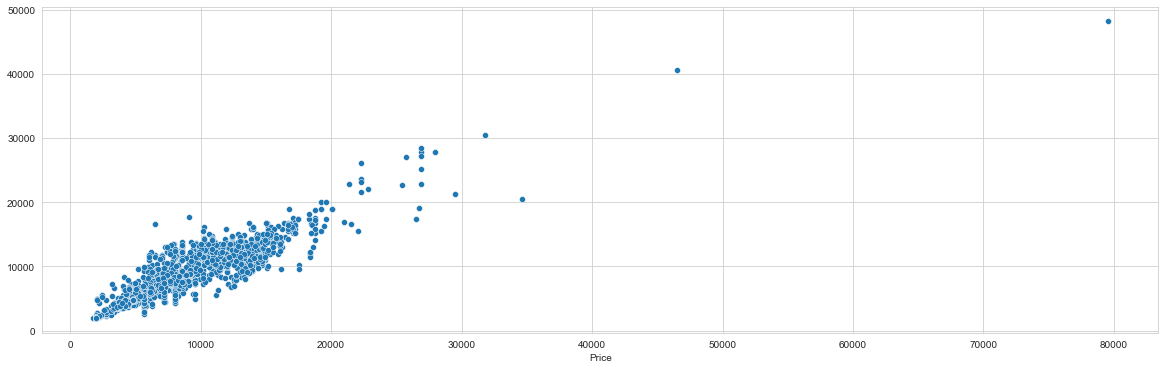

In [77]:
# y_test and y_pred scatterplot is almost straightline
# It meand predictions are good

sns.scatterplot(x=y_test, y=y_pred);

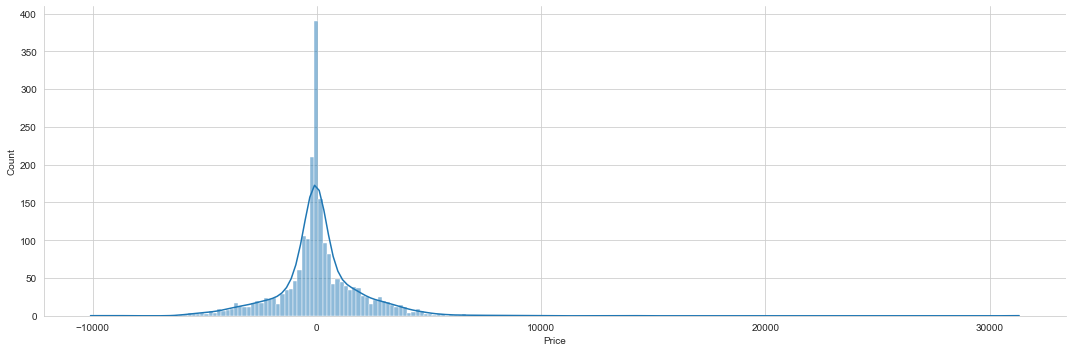

In [83]:
# Error distribution is almost normal.
# Good sign of good model

sns.displot(y_test-y_pred, height=5, aspect=3, kde=True);

# Hyper Parameter tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
max_features = ['auto', 'sqrt']


In [87]:
params = {'n_estimators':n_estimators,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf,
         'max_depth':max_depth,
         'max_features':max_features}

In [91]:
rf_random = RandomizedSearchCV(estimator=regressor, 
                          param_distributions=params,
                          scoring='neg_mean_squared_error',
                          n_iter=10,
                          cv=5,
                          verbose=2,
                          n_jobs=1,)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  23.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.0s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  23.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  23.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  35.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  35.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, total=  16.3s
[CV] n_estimators=1000, min_sample

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15, total=   6.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15, total=   5.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15, total=   5.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15, total=   5.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15, total=   5.6s
[CV] n_estimators=400, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [94]:
best_params = rf_random.best_params_

In [96]:
regressor = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                  max_features=best_params['max_features'],
                                  min_samples_split=best_params['min_samples_split'],
                                  min_samples_leaf=best_params['min_samples_leaf'],
                                  max_depth=best_params['max_depth'])

regressor = regressor.fit(X_train, y_train)

In [97]:
y_pred = regressor.predict(X_test)

In [98]:
# This is a good model as all three values almost same

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test, y_test)
test_score_r2 = r2_score(y_test,y_pred)

train_score, test_score, test_score_r2

(0.8870107901845238, 0.8496832617169445, 0.8496832617169445)

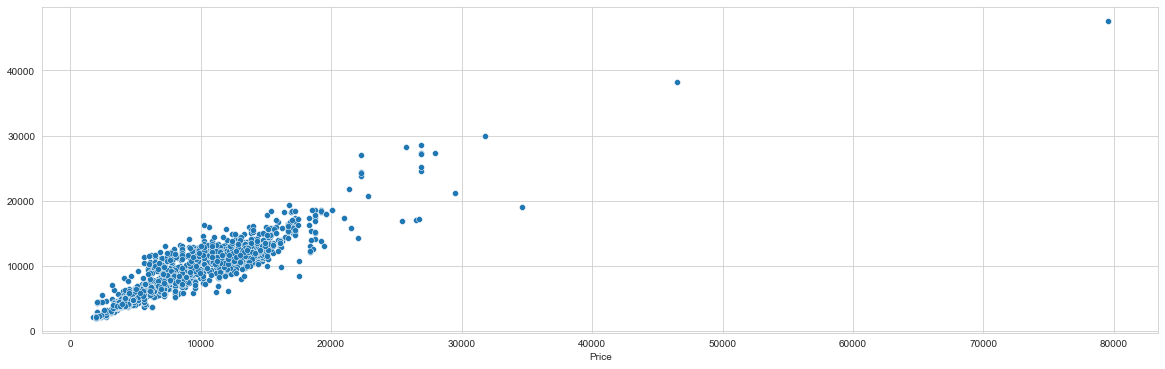

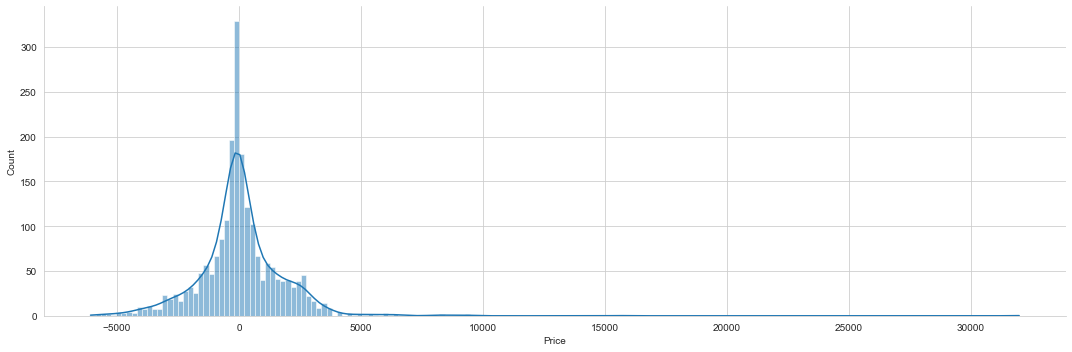

In [99]:
sns.scatterplot(x=y_test, y=y_pred);
sns.displot(y_test-y_pred, height=5, aspect=3, kde=True);

In [100]:
# dump the model in a pickle file

import pickle

file = open('FlightFarePrediction.pkl', 'wb')
pickle.dump(regressor, file)

In [101]:
# test the pickle file

model_file = open('FlightFarePrediction.pkl', 'rb')
model = pickle.load(model_file)

In [102]:
test_df_price = model.predict(fet_test_df)

In [137]:
print(pd.to_datetime('2010-10-04T03:41', format="%Y-%m-%dT%H:%M").time().minute)

41


In [127]:
dep = pd.to_datetime('2010-10-04T03:41', format="%Y-%m-%dT%H:%M")
arr = pd.to_datetime('2010-10-04T08:27', format="%Y-%m-%dT%H:%M")

comps = (arr-dep).components

In [128]:
"{}h {}m".format(comps.hours, comps.minutes)

'4h 46m'